### MLT Task#1:

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
* small decision tree;
* deep decision tree;
* random forest on small trees;
* random forest on deep trees;
Refer to ‘Random_Forrest.ipynb’ and ‘Decision_Trees.ipynb’ notebooks for examples. Split the data to train and test as 75% / 25%.
2. Calculate the following metrics to check the quality of your models:
* precision;
* recall;
* accuracy;
* F1-score;
* log-loss;
3. Plot precision-recall and ROC curves for your models.
4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be larger than 0.95.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, auc

In [3]:
%matplotlib inline

### Explore the data

In [64]:
#Load the dataset
df = pd.read_csv('bioresponse.csv', header=0)

In [65]:
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Split the data into features and target
X = df.drop("Activity", axis=1)
y = df["Activity"]

In [67]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Small decision tree

In [68]:
small_tree = DecisionTreeClassifier(max_depth=3)
small_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Deep decision tree

In [69]:
deep_tree = DecisionTreeClassifier(max_depth=10)
deep_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

#### Random forest on small trees

In [70]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth=3)
rf_small.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

#### Random forest on deep trees

In [71]:
rf_deep = RandomForestClassifier(n_estimators=10, max_depth=10)
rf_deep.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

#### Metrics calculation

In [72]:
def calculate_metrics(y_true, y_pred, y_prob, model_name):
    metrics = {
        'Model': model_name,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'Log-loss': log_loss(y_true, y_prob)
    }
    return metrics

results = []

# Make predictions
y_pred_small_tree = small_tree.predict(X_test)
y_pred_deep_tree = deep_tree.predict(X_test)
y_pred_small_rf = rf_small.predict(X_test)
y_pred_deep_rf = rf_deep.predict(X_test)

# Calculate the probabilities for log-loss calculation
y_prob_small_tree = small_tree.predict_proba(X_test)[:, 1]
y_prob_deep_tree = deep_tree.predict_proba(X_test)[:, 1]
y_prob_small_rf = rf_small.predict_proba(X_test)[:, 1]
y_prob_deep_rf = rf_deep.predict_proba(X_test)[:, 1]


results.append(calculate_metrics(y_test, y_pred_small_tree, y_prob_small_tree, "Small Decision Tree"))
results.append(calculate_metrics(y_test, y_pred_deep_tree, y_prob_deep_tree, "Deep Decision Tree"))
results.append(calculate_metrics(y_test, y_pred_small_rf, y_prob_small_rf, "Random Forest on Small Trees"))
results.append(calculate_metrics(y_test, y_pred_deep_rf, y_prob_deep_rf, "Random Forest on Deep Trees"))
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False, float_format='%.4f'))

                       Model  Precision  Recall  Accuracy  F1-score  Log-loss
         Small Decision Tree     0.7853  0.8000    0.7612    0.7926    0.5402
          Deep Decision Tree     0.7478  0.7813    0.7249    0.7642    4.9620
Random Forest on Small Trees     0.7600  0.7458    0.7207    0.7528    0.5881
 Random Forest on Deep Trees     0.8102  0.8056    0.7814    0.8079    0.4989


#### Models Interpretation

* The Best Model - ***Random Forest on Deep Trees*** - the highest: precision(81%), recall(80.6%), accuracy(78.1%), F1-score(80.8%), the lowest log-loss(0.499)
* The Worst Model - ***Deep Decision Tree*** - the high log-loss(4.96) - This means that the model is too sure of mistakes, others metrics not so good

#### Visualization precision-recall and ROC curves

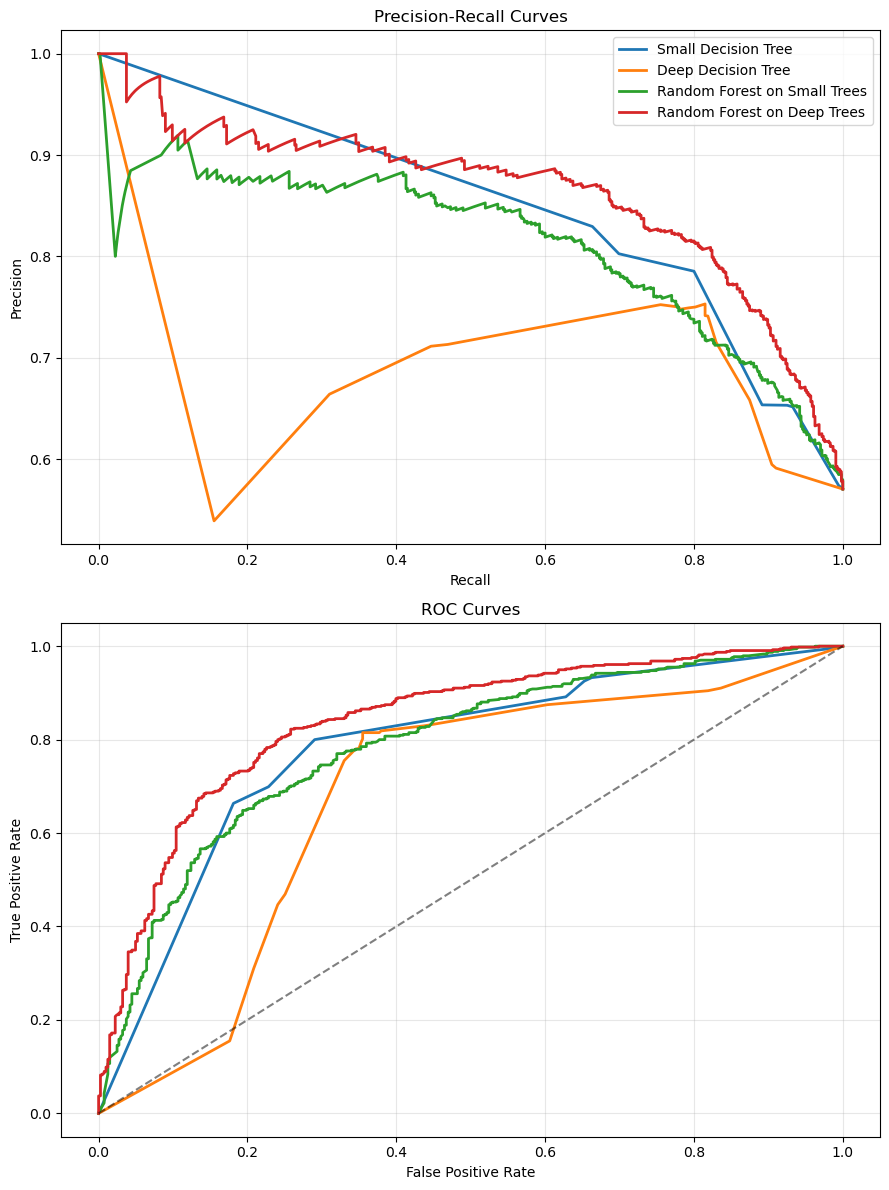

In [73]:
def plot_precision_recall(y_true, y_prob, label):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, label=label, linewidth=2)
    
def plot_roc(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})', linewidth=2)

models = [
    ("Small Decision Tree", y_prob_small_tree),
    ("Deep Decision Tree", y_prob_deep_tree),
    ("Random Forest on Small Trees", y_prob_small_rf),
    ("Random Forest on Deep Trees", y_prob_deep_rf)
]
# Plot precision-recall curves
plt.figure(figsize=(9, 12))
plt.subplot(2, 1, 1) 

for label, y_prob in models:
    plot_precision_recall(y_test, y_prob, label)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot ROC curves
plt.subplot(2, 1, 2)
for label, y_prob in models:
    plot_roc(y_test, y_prob, label)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', alpha=0.5)  
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

====OTHER VIEW OF PRECISION-RECALL CURVES=====



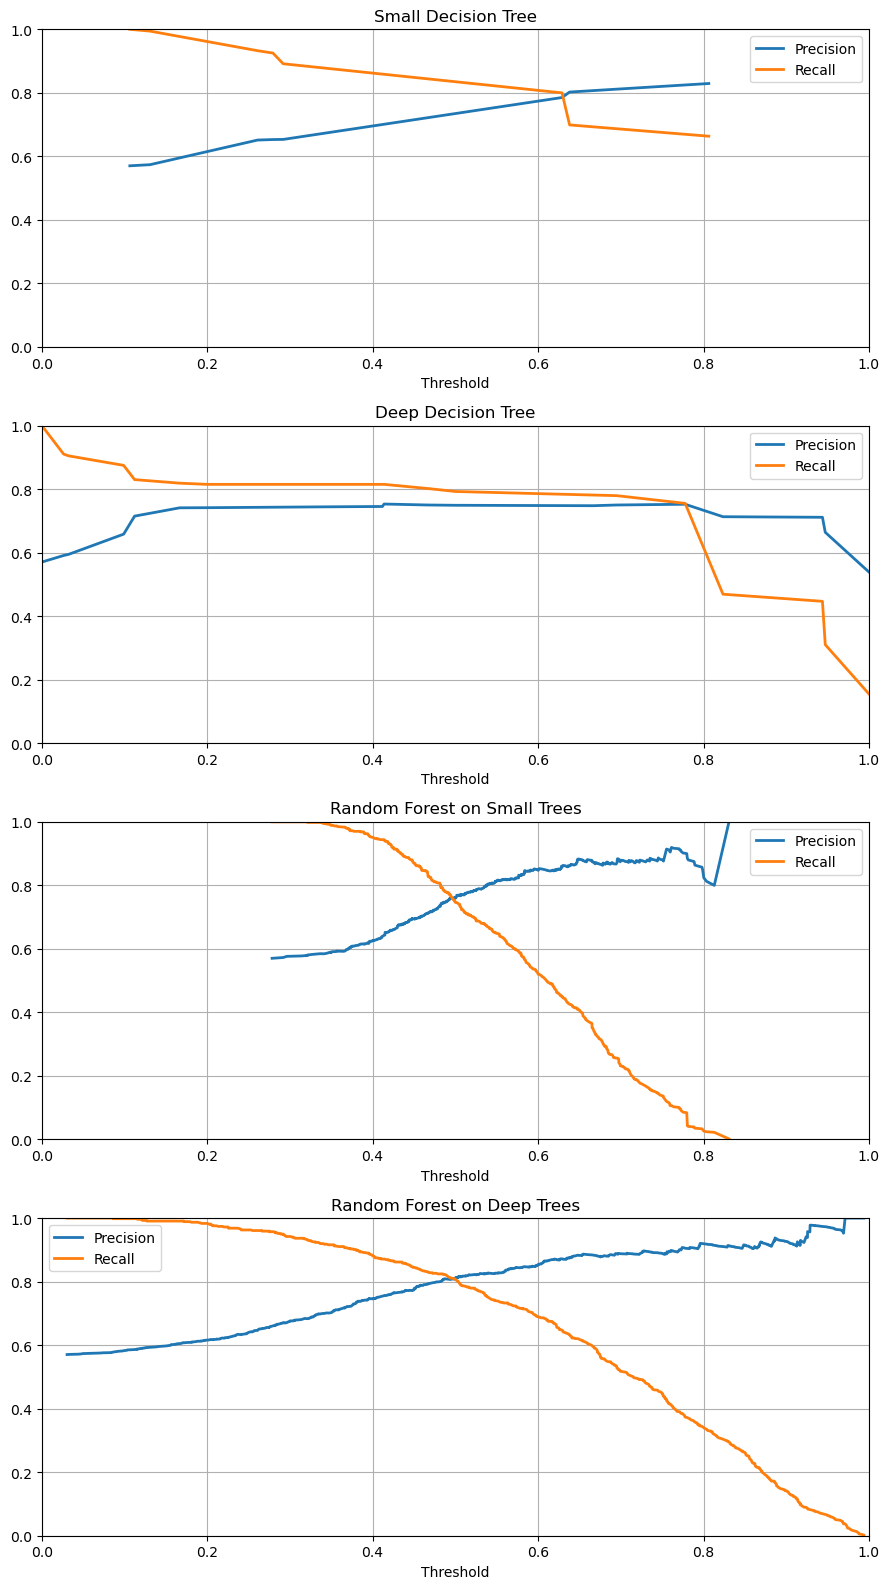

In [74]:
print("====OTHER VIEW OF PRECISION-RECALL CURVES=====\n")
fig, axes = plt.subplots(4, 1, figsize=(9, 16))

for i, (label, y_prob) in enumerate(models):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    ax = axes[i]
    ax.plot(thresholds, precision[:-1], linewidth=2, label='Precision')
    ax.plot(thresholds, recall[:-1], linewidth=2, label='Recall')
    ax.set_xlabel("Threshold")
    ax.set_title(f"{label}")
    ax.legend()
    ax.grid()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

#### Train a classifier who avoids Type II errors (Recall >= 0.95)

In [75]:
def classifier_with_high_recall(classifier, X_train, y_train, X_test, y_test, initial_threshold=0.5):
    classifier.fit(X_train, y_train)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    threshold = initial_threshold
    max_iterations = 150  
    iteration = 0
    
    for _ in range(max_iterations):
        y_pred = (y_prob >= threshold).astype(int)
        recall = recall_score(y_test, y_pred)
        
        if recall >= 0.95:
            break
            
        threshold -= 0.01
        if threshold <= 0.01: 
            break
    
    y_pred_final = (y_prob >= threshold).astype(int)
    final_recall = recall_score(y_test, y_pred_final)
    return threshold, y_pred_final, y_prob

high_recall_results = []

# Small Decision Tree
threshold_small_tree, y_pred_high_recall_small_tree, y_prob_small_tree = classifier_with_high_recall(
    small_tree, X_train, y_train, X_test, y_test)
high_recall_results.append(calculate_metrics(y_test, y_pred_high_recall_small_tree, 
                                           y_prob_small_tree, "Small Tree"))

# Deep Decision Tree  
threshold_deep_tree, y_pred_high_recall_deep_tree, y_prob_deep_tree = classifier_with_high_recall(
    deep_tree, X_train, y_train, X_test, y_test)
high_recall_results.append(calculate_metrics(y_test, y_pred_high_recall_deep_tree, 
                                           y_prob_deep_tree, "Deep Tree"))

# Random Forest on Small Trees
threshold_small_rf, y_pred_high_recall_small_rf, y_prob_small_rf = classifier_with_high_recall(
    rf_small, X_train, y_train, X_test, y_test)
high_recall_results.append(calculate_metrics(y_test, y_pred_high_recall_small_rf, 
                                           y_prob_small_rf, "Random Forest on Small Trees"))

# Random Forest on Deep Trees
threshold_deep_rf, y_pred_high_recall_deep_rf, y_prob_deep_rf = classifier_with_high_recall(
    rf_deep, X_train, y_train, X_test, y_test)
high_recall_results.append(calculate_metrics(y_test, y_pred_high_recall_deep_rf, 
                                           y_prob_deep_rf, "Random Forest on Deep Trees"))


high_recall_df = pd.DataFrame(high_recall_results)
print("\n High-Recall Models (Recall >= 0.95) \n")
print(high_recall_df.to_string(index=False, float_format='%.4f'))


 High-Recall Models (Recall >= 0.95) 

                       Model  Precision  Recall  Accuracy  F1-score  Log-loss
                  Small Tree     0.5739  0.9944    0.5757    0.7278    0.5402
                   Deep Tree     0.5922  0.9308    0.5949    0.7238    4.2799
Random Forest on Small Trees     0.6017  0.9514    0.6130    0.7371    0.6170
 Random Forest on Deep Trees     0.6671  0.9514    0.7015    0.7843    0.5022


#### Models Interpretation

* The Best Model - ***Random Forest on Deep Trees*** - the highest: precision(66%), accuracy(70.1%), F1-score(78.4%), the lowest log-loss(0.499)
* One The Worst Model I can't choose, because - ***Deep Decision Tree*** has the highest log-loss(4.27) and the lowest recall(93%), ***Small Tree*** has the lowest presicion(57.4%), accuracy(57.6%), ***Deep Tree*** has the lowest F1-score(0.7238)